In [2]:
# copy code fron previous code 
# few fixes to avoid overflow 
import numpy as np
import math
inf=int(1e3) #small value to avoid overflow error
def sum1(n,z):
    f= lambda k: 1/(2**(n+1)) * (-1)**k * math.comb(n,k) * (k+1)**(-z) # distribute
    vf= np.vectorize(f)
    arr=vf(range(0,n+1))
    s=arr.sum()
    return s

def sum2(z):
    f= lambda n:  sum1(n,z)
    vf=np.vectorize(f)
    arr=vf(range(0,inf))
    s=arr.sum()
    return s

zeta = lambda z: 1/(1-2**(1-z)) * sum2(z) if z!=1 else None

In [3]:
import pandas as pd
df= pd.DataFrame(columns=['reals','imags','complex', 'zeta', 'zeta_abs'])

In [4]:
reals= np.arange(-5,5,.5)
imags= np.arange(-5,5,.5)

In [5]:
from itertools import product
df[['reals','imags']]=list(product(reals,imags))

In [6]:
df['complex']=df['reals']+ df['imags']*1j

In [8]:
df['zeta']=df['complex'].apply(zeta)

In [9]:
df['zeta_abs']=df['zeta'].apply(abs)

In [10]:
df

,reals,imags,complex,zeta,zeta_abs
0,-5.0,-5.0,-5.0-5.0j,-0.648173+0.060478j,0.650989
1,-5.0,-4.5,-5.0-4.5j,-0.414777+0.074929j,0.421491
2,-5.0,-4.0,-5.0-4.0j,-0.263325+0.055023j,0.269012
3,-5.0,-3.5,-5.0-3.5j,-0.158814+0.048817j,0.166147
4,-5.0,-3.0,-5.0-3.0j,-0.089633+0.017231j,0.091274
...,...,...,...,...,...
395,4.5,2.5,4.5+2.5j,0.984099-0.044607j,0.985109
396,4.5,3.0,4.5+3.0j,0.970992-0.034904j,0.971619
397,4.5,3.5,4.5+3.5j,0.962502-0.022265j,0.962760
398,4.5,4.0,4.5+4.0j,0.958772-0.008443j,0.958809


In [12]:
pivot=pd.pivot_table(df, values='zeta_abs', index='imags', columns='reals')
pivot

reals,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5
imags,,,,,,,,,,,,,,,,,,,,
-5.0,0.650989,0.603099,5.714828e-01,0.553712,0.547911,0.552722,5.670737e-01,0.589953,0.620200,0.656358,0.696614,0.738863,0.780904,0.820711,0.856702,0.887898,0.913942,0.934991,0.951545,0.964276
-4.5,0.421491,0.400767,3.896151e-01,0.388027,0.395564,0.411970,4.371226e-01,0.470818,0.512511,0.561071,0.614641,0.670685,0.726283,0.778612,0.825442,0.865455,0.898280,0.924303,0.944370,0.959511
-4.0,0.269012,0.260130,2.591850e-01,0.265612,0.279493,0.301351,3.318920e-01,0.371748,0.421115,0.479332,0.544534,0.613586,0.682475,0.747119,0.804294,0.852217,0.890592,0.920214,0.942452,0.958809
-3.5,0.166147,0.163680,1.676645e-01,0.177052,0.192694,0.215757,2.477253e-01,0.290185,0.344345,0.410339,0.486482,0.568875,0.651824,0.729236,0.796369,0.850933,0.893015,0.924228,0.946766,0.962760
-3.0,0.091274,0.099925,1.051754e-01,0.114484,0.129102,0.150596,1.811724e-01,0.223543,0.280355,0.353122,0.440794,0.538547,0.637970,0.729514,0.806087,0.865114,0.907914,0.937715,0.957986,0.971619
-2.5,0.056763,0.059033,6.363646e-02,0.071445,0.083602,0.101877,1.291078e-01,0.169331,0.227224,0.306670,0.408273,0.526283,0.647499,0.755778,0.840267,0.899351,0.937713,0.961600,0.976206,0.985109
-2.0,0.029101,0.033368,3.693448e-02,0.042771,0.051989,0.066233,8.878959e-02,0.125236,0.183044,0.270030,0.390804,0.539633,0.693977,0.822994,0.909942,0.959302,0.984187,0.995673,1.000488,1.002181
-1.5,0.022484,0.018598,2.038297e-02,0.024389,0.030895,0.040896,5.785060e-02,0.089212,0.146084,0.242379,0.392192,0.595568,0.809924,0.963175,1.032725,1.050041,1.046482,1.037373,1.028292,1.020802
-1.0,0.008167,0.009378,1.036762e-02,0.013156,0.017719,0.023636,3.418719e-02,0.059679,0.115397,0.223073,0.418168,0.736305,1.094512,1.253638,1.230752,1.168912,1.117101,1.080289,1.055105,1.037976


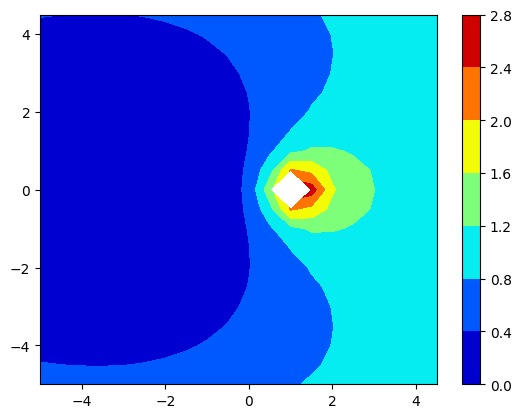

In [16]:
import matplotlib.pyplot as plt
plt.contourf(pivot.index, pivot.columns, pivot, cmap='jet')
plt.colorbar()